In [1]:
import numpy as np
import pandas as pd
from matplotlib.path import Path
import matplotlib.pyplot as plt

### User coordinates

In [2]:
ppl = pd.read_csv('user_coordinates.csv') # я добавил ещё одного пользователя, т.к. предыдущие не попадали в данные полигоны.

In [3]:
ppl['number_of_places_available'] = 0

In [4]:
ppl   

,user_id,loc_lat,loc_lon,number_of_places_available
0,1,55.737564,37.345186,0
1,2,56.234564,37.234590,0
2,3,55.234578,36.295745,0
3,4,55.808000,37.460000,0


### Place zone coordinates

In [5]:
places = pd.read_csv('place_zone_coordinates.csv')

In [6]:
places

,place_id,loc_lat,loc_lon,point_number
0,1,55.747022,37.787073,0
1,1,55.751713,37.784328,1
2,1,55.753878,37.777638,2
3,1,55.751031,37.779351,3
4,2,55.803885,37.458311,0
5,2,55.808677,37.464054,1
6,2,55.809763,37.461314,2
7,2,55.810840,37.458654,3


In [7]:
places['lat_lon'] = places[['loc_lat', 'loc_lon']].values.tolist()

In [8]:
places

,place_id,loc_lat,loc_lon,point_number,lat_lon
0,1,55.747022,37.787073,0,"[55.747021999999994, 37.787073]"
1,1,55.751713,37.784328,1,"[55.751713, 37.784328]"
2,1,55.753878,37.777638,2,"[55.753878, 37.777638]"
3,1,55.751031,37.779351,3,"[55.751031000000005, 37.779351]"
4,2,55.803885,37.458311,0,"[55.803885, 37.458311]"
5,2,55.808677,37.464054,1,"[55.808677, 37.464054]"
6,2,55.809763,37.461314,2,"[55.809763000000004, 37.461314]"
7,2,55.810840,37.458654,3,"[55.81084, 37.458653999999996]"


In [10]:
# Группируем все точки одного места в полигон
grouped = places.groupby('place_id')['lat_lon'].apply(list).apply(Path)

### Считаем пересечения

In [16]:
lat_lons = ppl[['loc_lat', 'loc_lon']].values

for path in grouped:
    ppl['number_of_places_available'] += path.contains_points(lat_lons)

In [17]:
ppl

,user_id,loc_lat,loc_lon,number_of_places_available
0,1,55.737564,37.345186,0
1,2,56.234564,37.234590,0
2,3,55.234578,36.295745,0
3,4,55.808000,37.460000,3


### Тест

In [18]:
xs, ys = zip(*path.vertices)
xs = list(xs)
xs.append(xs[0])
ys = list(ys)
ys.append(ys[0])

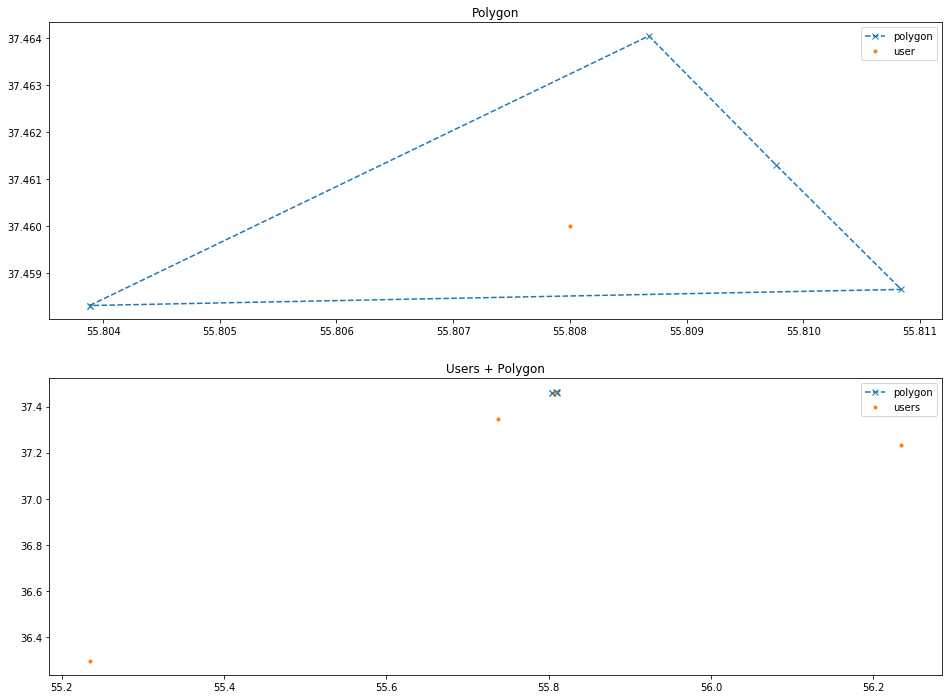

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
axes[0].plot(xs, ys, 'x--', label='polygon')
axes[0].plot(55.808, 37.460, '.', label='user')
axes[0].set_title('Polygon')
axes[0].legend()
axes[1].plot(xs, ys, 'x--', label='polygon')
axes[1].plot(lat_lons[:, 0], lat_lons[:, 1], '.', label='users')
axes[1].set_title('Users + Polygon')
axes[1].legend()

### Вывод результатов

In [15]:
ppl[['user_id', 'number_of_places_available']].to_csv('result.csv', index=False)